In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Dictionary

* A1: Question 1 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A2: Question 2 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A3: Question 3 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A4: Question 4 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A5: Question 5 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A6: A6: Question 6 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A7: Question 7 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A8: Question 8 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used 

* A9: Question 9 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* A:10 Question 10 Answer 	Binary (0, 1)	The answer code of the question based on the screening method used  

* Age	Number: 	Toddlers (months)

* Score by Q-chat-10: 	Number	1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits

* Sex	Character:	Male or Female 

* Ethnicity:	String	List of common ethnicities in text format 

* Born with jaundice:	Boolean  (yes or no)	Whether the case was born with jaundice

* Family member with ASD history:	Boolean  (yes or no)	Whether any immediate family member has a PDD 

* Who is completing the test:	String 	Parent, self, caregiver, medical staff, clinician ,etc.

* Why_are_you_taken_the_screening	String:	Use input textbox 

* Class variable 	String 	ASD traits or No ASD traits: (automatically assigned by the ASDTests app). (Yes / No)


# Importing data

In [2]:
df = pd.read_csv("Toddler Autism dataset July 2018.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
# This code snippet uses the pandas library to read in a CSV file named "Toddler Autism dataset July 2018.csv"
# and assigns it to the variable "df"

import pandas as pd

df = pd.read_csv("Toddler Autism dataset July 2018.csv")

# The "head()" function is then called on the "df" DataFrame, which returns the first five rows of the data
# This is useful for quickly checking the structure and contents of the DataFrame
df.head()


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
# renaming the columns of the dataframe

df.columns = df.columns.str.replace('/','_').str.replace(' ','')

rename_columns = {
    'Age_Mons':'Age_In_Months',
    'Qchat-10-Score':'Qchat_10_Score',
    'Family_mem_with_ASD': 'Family_Mem_With_ASD',
    'Class_ASDTraits' : 'ASD_Diagnosed',
    'Whocompletedthetest' : 'Who_Completed_The_Test'
}

df.rename(columns=rename_columns, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_In_Months           1054 non-null   int64 
 12  Qchat_10_Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

#### Inference

* No null values are present
* Total 1054 records of toddlers and 18 predictors excluding the target variable
* Contains 13 numeric features and 6 string features
* Case_No is an unwanted variable and hence can be removed from the dataset
* Based on the data dictionary Qchat_10_score column can also be dropped, however let us check the correlation with target variable and then decide upon it

In [6]:
# Dropping the unwanted variable

df.drop('Case_No', inplace=True, axis=1)

# Exploratory Data Analysis

In [7]:
# Displaying first 5 rows

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [8]:
# Displaying last 5 rows

df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [9]:
# descriptive summary of the numeric features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,1054.0,0.563567,0.496178,0.0,0.0,1.0,1.0,1.0
A2,1054.0,0.448767,0.497604,0.0,0.0,0.0,1.0,1.0
A3,1054.0,0.401328,0.490400,0.0,0.0,0.0,1.0,1.0
A4,1054.0,0.512334,0.500085,0.0,0.0,1.0,1.0,1.0
A5,1054.0,0.524668,0.499628,0.0,0.0,1.0,1.0,1.0
A6,1054.0,0.576850,0.494293,0.0,0.0,1.0,1.0,1.0
A7,1054.0,0.649905,0.477226,0.0,0.0,1.0,1.0,1.0
A8,1054.0,0.459203,0.498569,0.0,0.0,0.0,1.0,1.0
A9,1054.0,0.489564,0.500128,0.0,0.0,0.0,1.0,1.0
A10,1054.0,0.586338,0.492723,0.0,0.0,1.0,1.0,1.0


#### Inference

* A1 to A10 can be considered as binary categorical variables
* Average age of a toddler is 27 months and w.r.t median age we can see the data is slightly left skewed
* The age ranges from 1 to 3 years
* Nearly 75% of the Qchat scores are above 3 which is the cut-off for ASD classification

In [10]:
# descriptive summary of the string features

df.describe(include='object').T

,count,unique,top,freq
Sex,1054,2,m,735
Ethnicity,1054,11,White European,334
Jaundice,1054,2,no,766
Family_Mem_With_ASD,1054,2,no,884
Who_Completed_The_Test,1054,5,family member,1018
ASD_Diagnosed,1054,2,Yes,728


#### Inference

* Male toddlers are found to be having the highest proportion
* Majority of the toddlers belong to white european ethinicity
* Most of the toddlers were not diagnosed with Jaundice at early stages
* More than 90% of the test givers were family members

In [11]:
print("Unqiue values per column:")
df.nunique()

Unqiue values per column:


A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age_In_Months             25
Qchat_10_Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family_Mem_With_ASD        2
Who_Completed_The_Test     5
ASD_Diagnosed              2
dtype: int64

In [12]:
# check for duplicate columns

print("Number of duplicate rows:", df.duplicated().sum())
df[df.duplicated()]

Number of duplicate rows: 79


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_In_Months,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_Mem_With_ASD,Who_Completed_The_Test,ASD_Diagnosed
33,0,0,0,0,0,0,0,0,0,0,12,0,f,middle eastern,no,no,family member,No
38,0,0,0,0,0,0,0,0,0,0,15,0,f,middle eastern,no,no,family member,No
39,0,0,0,0,0,0,0,0,0,1,15,1,f,middle eastern,no,no,family member,No
40,0,0,0,0,0,0,0,0,0,1,12,1,f,middle eastern,no,no,family member,No
42,0,0,0,0,0,0,0,0,0,0,15,0,f,black,no,no,family member,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0,0,0,0,1,1,0,1,0,1,35,4,f,asian,no,no,family member,Yes
1006,1,0,1,1,1,0,1,0,0,1,24,6,m,asian,no,no,family member,Yes
1022,0,0,0,0,0,0,0,0,0,0,36,0,f,White European,no,yes,family member,No
1026,0,0,0,0,0,0,0,0,0,1,36,1,m,White European,no,no,family member,No


#### Inference

Even though each records are unique, presence of duplicate columns does not have any significance in contribution to model prediction and hence these have to be removed

In [13]:
# dropping the duplicate rows

df = df.drop_duplicates()

print("Number of duplicate rows after treatment:", df.duplicated().sum())

Number of duplicate rows after treatment: 0


In [14]:
# checking the dimensions of the data

df.shape

(975, 18)

# Univariate Analysis

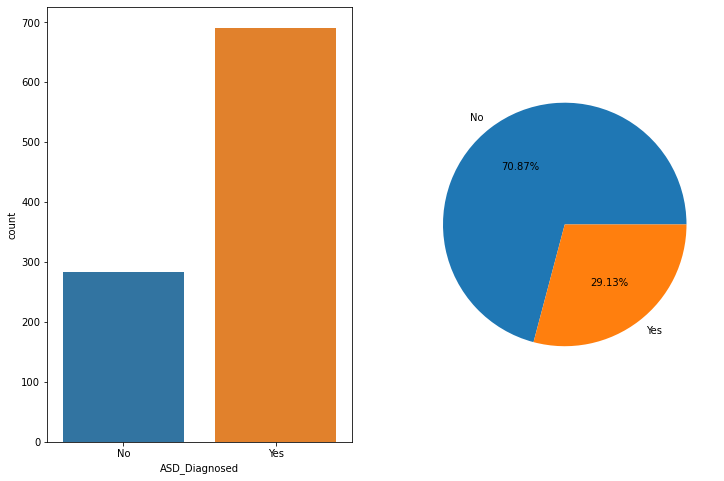

In [27]:
# checking the target variable - accident severity for class imbalance

plt.figure(figsize=(12,8))

# bar plot

ax1 = plt.subplot(1,2,1)
countplot = sns.countplot(x=df['ASD_Diagnosed'])

ax2 = plt.subplot(1,2,2)
plt.pie(x=df['ASD_Diagnosed'].value_counts(), labels= list(df['ASD_Diagnosed'].unique()), autopct='%1.2f%%')

plt.show()

In [15]:
# Univariate analysis on numeric columns

def univariate_analysis(column,nbins):
    print('\033[1m'+ "Description of " + column + '\033[0m' + '\n' )
    print(df[column].describe())
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "Distribution of " + column + '\033[0m' + '\n')
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    print("----------------------------------------------------------------------------")
    
    
    plt.figure()
    print('\033[1m'+ "BoxPlot of " + column + '\033[0m' + '\n')
    ax = sns.boxplot(x=df[column])
    plt.show()
    print("----------------------------------------------------------------------------")
    

Description of A1

count    975.000000
mean       0.575385
std        0.494538
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A1, dtype: float64
----------------------------------------------------------------------------
Distribution of A1



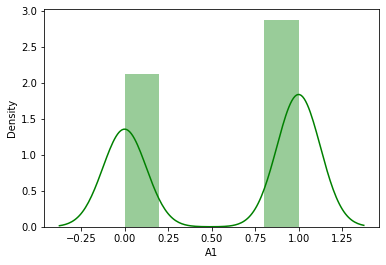

----------------------------------------------------------------------------
BoxPlot of A1



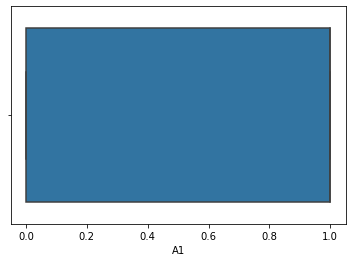

----------------------------------------------------------------------------
Description of A2

count    975.000000
mean       0.457436
std        0.498441
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A2, dtype: float64
----------------------------------------------------------------------------
Distribution of A2



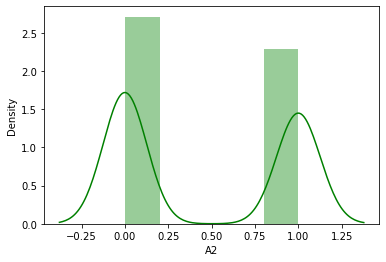

----------------------------------------------------------------------------
BoxPlot of A2



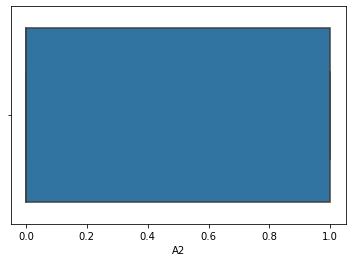

----------------------------------------------------------------------------
Description of A3

count    975.000000
mean       0.397949
std        0.489726
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A3, dtype: float64
----------------------------------------------------------------------------
Distribution of A3



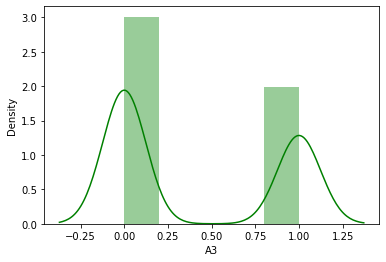

----------------------------------------------------------------------------
BoxPlot of A3



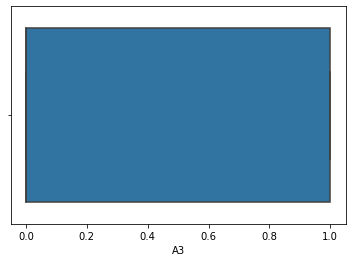

----------------------------------------------------------------------------
Description of A4

count    975.000000
mean       0.517949
std        0.499934
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A4, dtype: float64
----------------------------------------------------------------------------
Distribution of A4



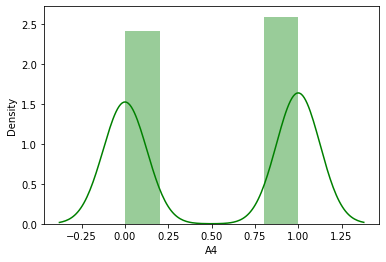

----------------------------------------------------------------------------
BoxPlot of A4



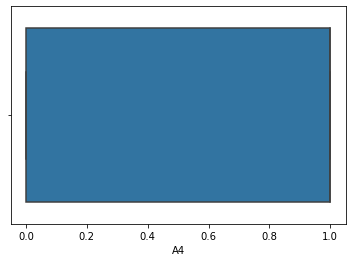

----------------------------------------------------------------------------
Description of A5

count    975.000000
mean       0.530256
std        0.499340
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A5, dtype: float64
----------------------------------------------------------------------------
Distribution of A5



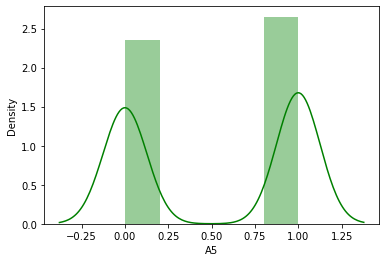

----------------------------------------------------------------------------
BoxPlot of A5



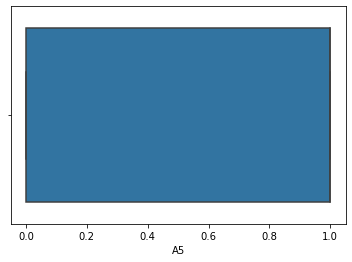

----------------------------------------------------------------------------
Description of A6

count    975.000000
mean       0.583590
std        0.493216
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A6, dtype: float64
----------------------------------------------------------------------------
Distribution of A6



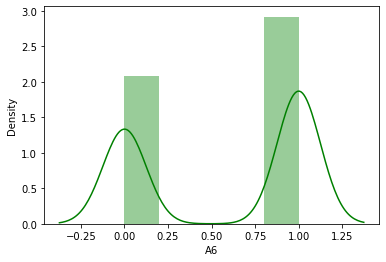

----------------------------------------------------------------------------
BoxPlot of A6



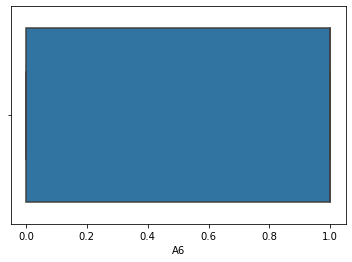

----------------------------------------------------------------------------
Description of A7

count    975.000000
mean       0.667692
std        0.471282
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A7, dtype: float64
----------------------------------------------------------------------------
Distribution of A7



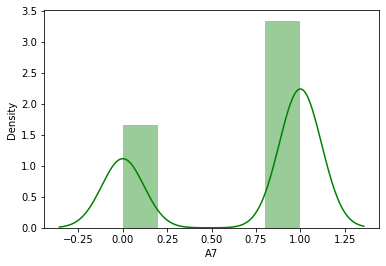

----------------------------------------------------------------------------
BoxPlot of A7



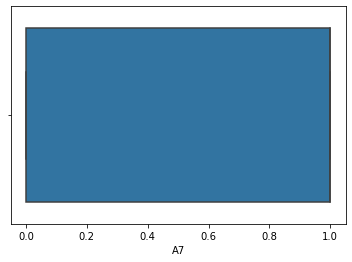

----------------------------------------------------------------------------
Description of A8

count    975.000000
mean       0.464615
std        0.499002
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A8, dtype: float64
----------------------------------------------------------------------------
Distribution of A8



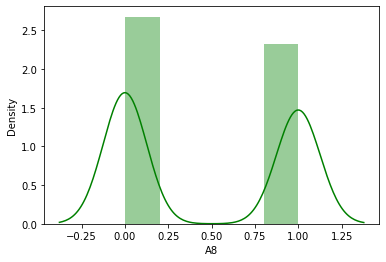

----------------------------------------------------------------------------
BoxPlot of A8



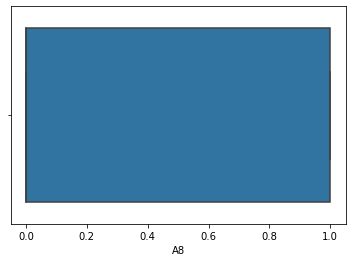

----------------------------------------------------------------------------
Description of A9

count    975.000000
mean       0.497436
std        0.500250
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A9, dtype: float64
----------------------------------------------------------------------------
Distribution of A9



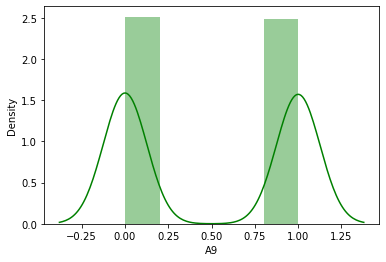

----------------------------------------------------------------------------
BoxPlot of A9



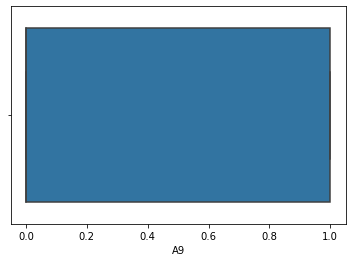

----------------------------------------------------------------------------
Description of A10

count    975.000000
mean       0.585641
std        0.492864
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A10, dtype: float64
----------------------------------------------------------------------------
Distribution of A10



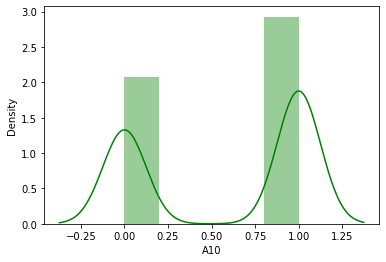

----------------------------------------------------------------------------
BoxPlot of A10



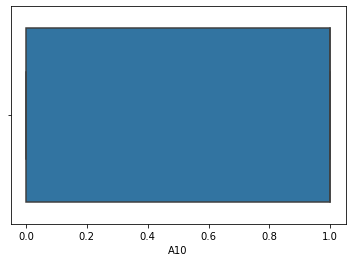

----------------------------------------------------------------------------
Description of Age_In_Months

count    975.000000
mean      27.899487
std        7.855350
min       12.000000
25%       23.000000
50%       30.000000
75%       36.000000
max       36.000000
Name: Age_In_Months, dtype: float64
----------------------------------------------------------------------------
Distribution of Age_In_Months



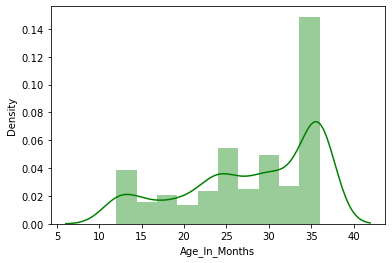

----------------------------------------------------------------------------
BoxPlot of Age_In_Months



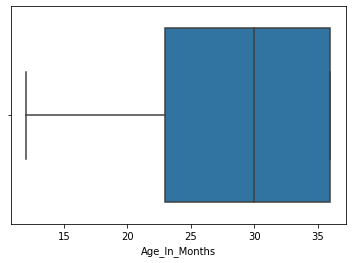

----------------------------------------------------------------------------
Description of Qchat_10_Score

count    975.000000
mean       5.277949
std        2.818915
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Qchat_10_Score, dtype: float64
----------------------------------------------------------------------------
Distribution of Qchat_10_Score



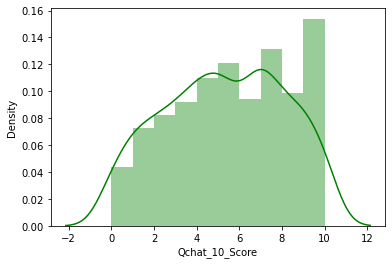

----------------------------------------------------------------------------
BoxPlot of Qchat_10_Score



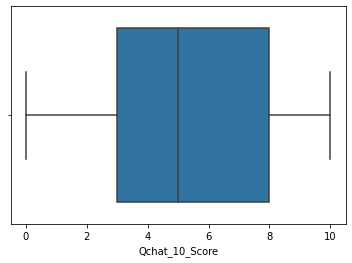

----------------------------------------------------------------------------


In [16]:
for column in list(df.select_dtypes(exclude='object').columns):
    univariate_analysis(column,20)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'A1'),
  Text(2, 0, 'A2'),
  Text(3, 0, 'A3'),
  Text(4, 0, 'A4'),
  Text(5, 0, 'A5'),
  Text(6, 0, 'A6'),
  Text(7, 0, 'A7'),
  Text(8, 0, 'A8'),
  Text(9, 0, 'A9'),
  Text(10, 0, 'A10'),
  Text(11, 0, 'Age_In_Months'),
  Text(12, 0, 'Qchat_10_Score')])

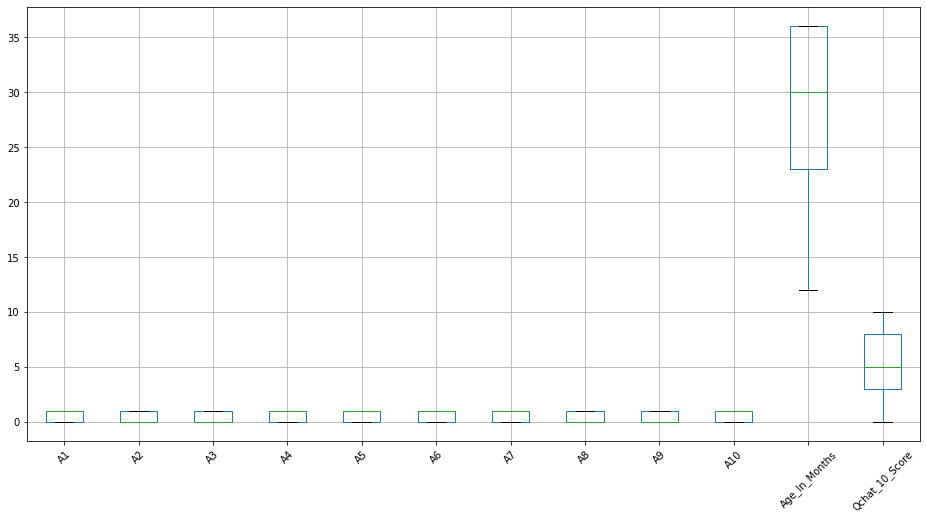

In [17]:
# Checking the presence of outliers in the dataset all columns at once

plt.figure(figsize=(16,8))
df.boxplot()
plt.xticks(rotation=45)

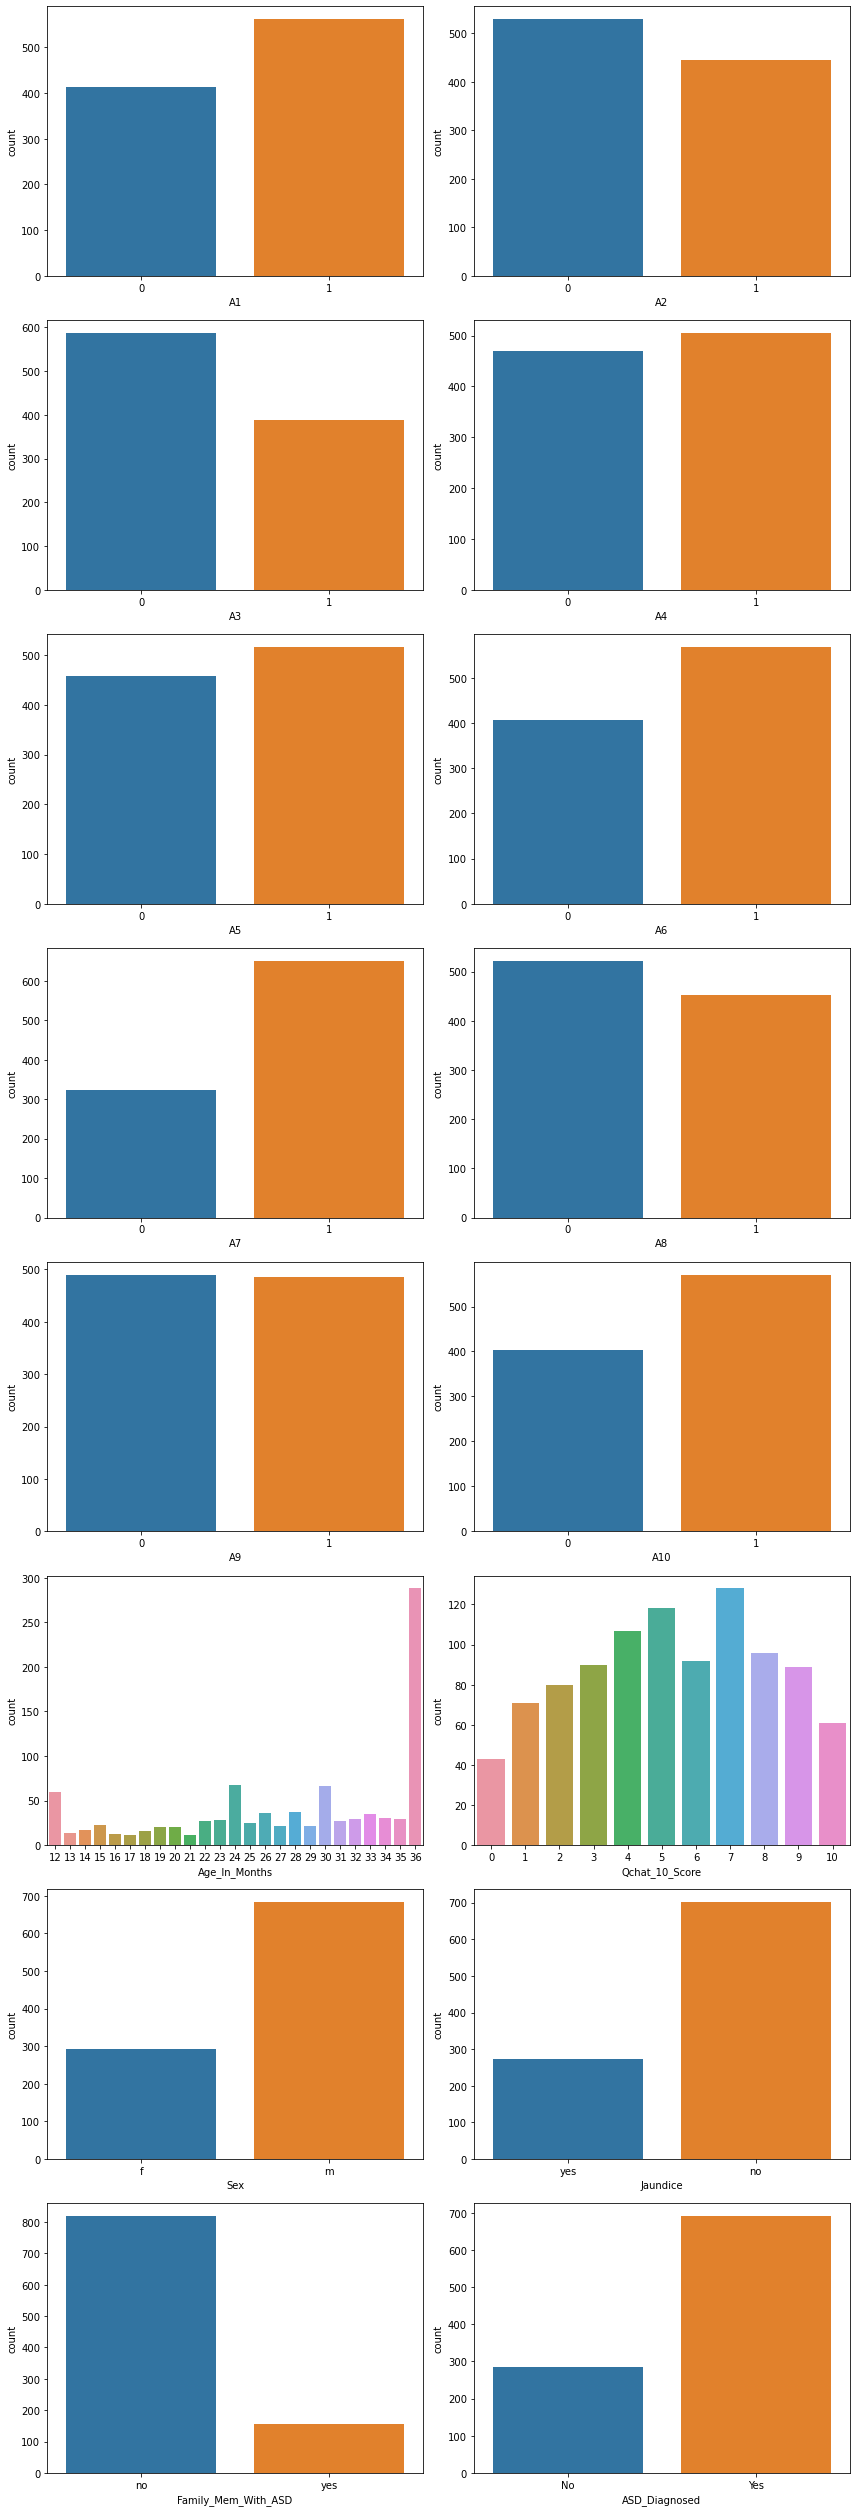

In [18]:
# Count plot of all object columns

plt.figure(figsize=(12,35))
plotnumber = 1

for column in df.drop(['Ethnicity','Who_Completed_The_Test'], axis=1):
    if plotnumber <=df.shape[1]:
        ax1 = plt.subplot(8,2,plotnumber)
        sns.countplot(data=df, x=column)
    plotnumber +=1
plt.tight_layout()
        


<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

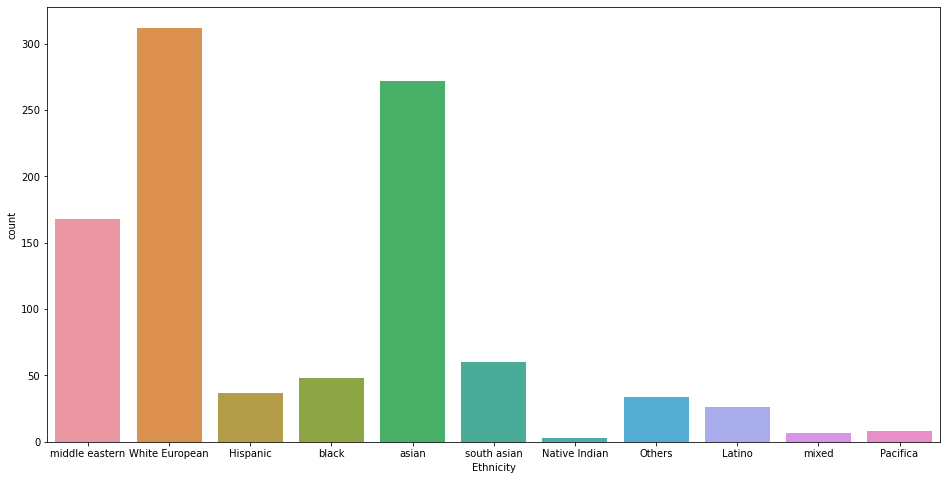

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Ethnicity')

<AxesSubplot:xlabel='Who_Completed_The_Test', ylabel='count'>

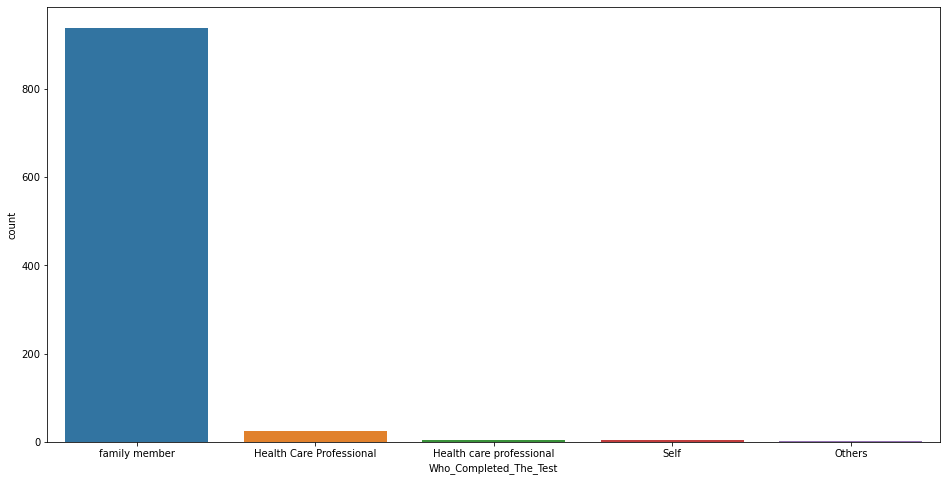

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Who_Completed_The_Test')

# Multivariate Analysis

<AxesSubplot:>

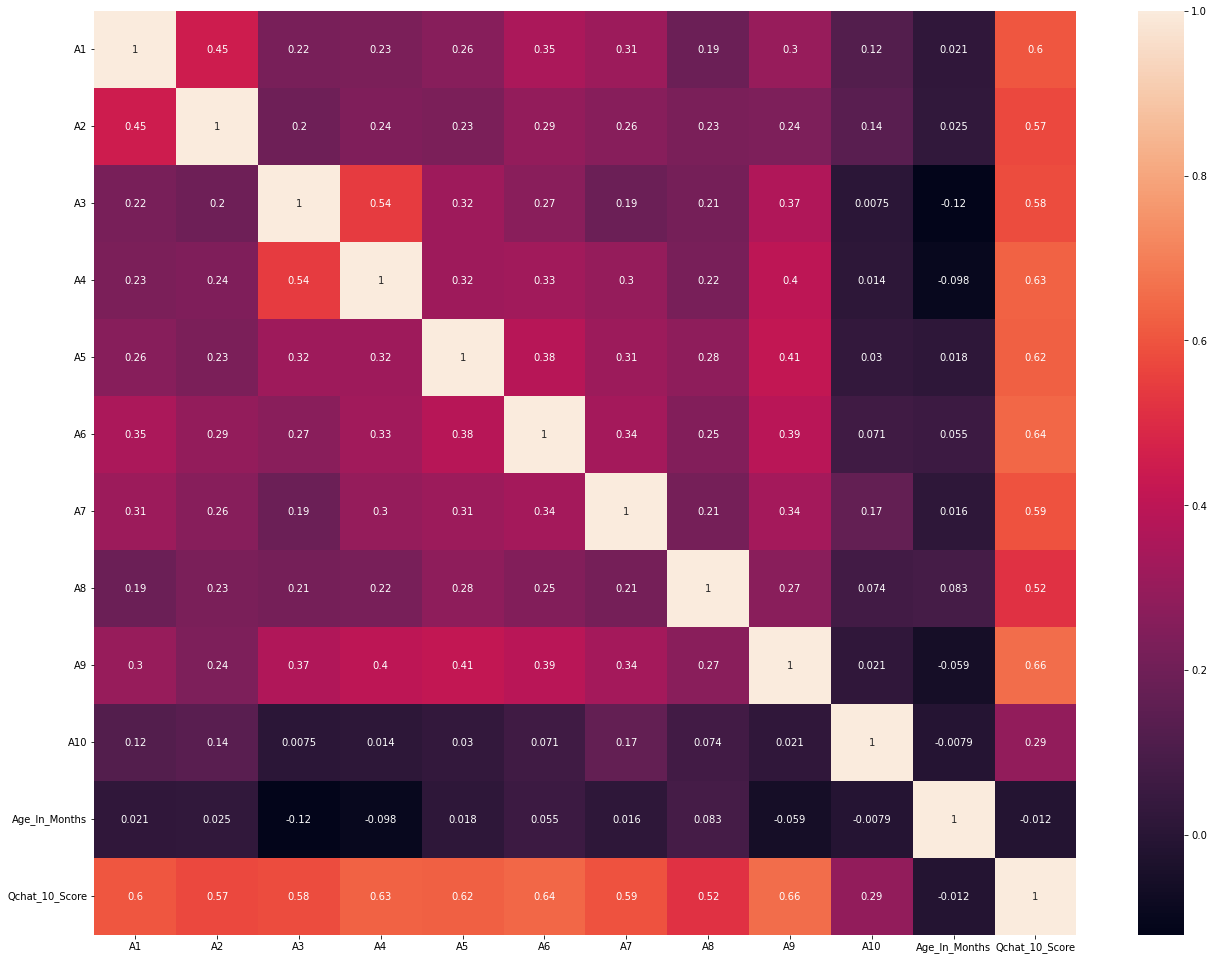

In [29]:
plt.figure(figsize=(22,17))
sns.heatmap(df.corr(),annot=True)